In [ ]:
# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Loading MNIST Data

In [ ]:
import numpy as np
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame=False)

X = mnist["data"]
y = mnist["target"].astype(np.uint8)

X_train = X[:60000]
y_train = y[:60000]
X_test = X[60000:]
y_test = y[60000:]

# SVM Model Tuning using Polynomial Kernel

## Polynomial Kernel - Grid Search

In [ ]:
# Scale down the training and test data
X_train_small = X_train[:10000]  # Use first 10,000 samples for training
y_train_small = y_train[:10000]

X_test_small = X_test[6000:]  # Use last 10,000 samples for testing
y_test_small = y_test[6000:]

In [ ]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# Define the parameter grid for Grid Search
param_grid = {
    'C': [0.1, 1, 10],  # Regularization parameter
    'kernel': ['poly'],
    'degree': [2, 4, 5],  # Degree of polynomial kernel
    'coef0': [0.0, 0.5, 1.0]
}

svm = SVC()

# Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid,
                           scoring='accuracy', cv=3,  n_jobs=-1)

# Fit the model
grid_search.fit(X_train_small, y_train_small)

GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'coef0': [0.0, 0.5, 1.0],
                         'degree': [2, 4, 5], 'kernel': ['poly']},
             scoring='accuracy')

In [ ]:
grid_search.best_params_

{'C': 10, 'coef0': 0.0, 'degree': 2, 'kernel': 'poly'}

In [ ]:
grid_search.best_score_

0.9557996891470791

In [ ]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

nan {'C': 0.1, 'coef0': 0.0, 'degree': 2, 'kernel': 'poly'}
nan {'C': 0.1, 'coef0': 0.0, 'degree': 4, 'kernel': 'poly'}
nan {'C': 0.1, 'coef0': 0.0, 'degree': 5, 'kernel': 'poly'}
nan {'C': 0.1, 'coef0': 0.5, 'degree': 2, 'kernel': 'poly'}
nan {'C': 0.1, 'coef0': 0.5, 'degree': 4, 'kernel': 'poly'}
nan {'C': 0.1, 'coef0': 0.5, 'degree': 5, 'kernel': 'poly'}
nan {'C': 0.1, 'coef0': 1.0, 'degree': 2, 'kernel': 'poly'}
nan {'C': 0.1, 'coef0': 1.0, 'degree': 4, 'kernel': 'poly'}
nan {'C': 0.1, 'coef0': 1.0, 'degree': 5, 'kernel': 'poly'}
nan {'C': 1, 'coef0': 0.0, 'degree': 2, 'kernel': 'poly'}
nan {'C': 1, 'coef0': 0.0, 'degree': 4, 'kernel': 'poly'}
nan {'C': 1, 'coef0': 0.0, 'degree': 5, 'kernel': 'poly'}
nan {'C': 1, 'coef0': 0.5, 'degree': 2, 'kernel': 'poly'}
nan {'C': 1, 'coef0': 0.5, 'degree': 4, 'kernel': 'poly'}
nan {'C': 1, 'coef0': 0.5, 'degree': 5, 'kernel': 'poly'}
nan {'C': 1, 'coef0': 1.0, 'degree': 2, 'kernel': 'poly'}
nan {'C': 1, 'coef0': 1.0, 'degree': 4, 'kernel': 'pol

<ipython-input-56-4ec637f9de24>:3: RuntimeWarning: invalid value encountered in sqrt
  print(np.sqrt(-mean_score), params)


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Predict on the test set using the best found model
y_pred = grid_search.best_estimator_.predict(X_test_small)

# Calculate precision, recall, and F1-score
print("Classification Report:\n", classification_report(y_test_small, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       412
           1       0.99      0.99      0.99       449
           2       0.95      0.97      0.96       407
           3       0.97      0.96      0.96       415
           4       0.97      0.99      0.98       383
           5       0.96      0.94      0.95       344
           6       0.97      0.98      0.98       396
           7       0.98      0.97      0.97       419
           8       0.96      0.96      0.96       387
           9       0.98      0.94      0.96       388

    accuracy                           0.97      4000
   macro avg       0.97      0.97      0.97      4000
weighted avg       0.97      0.97      0.97      4000



## Polynomial Kernel - Random Search

In [ ]:
# Scale down the training and test data
X_train_small = X_train[:10000]  # Use first 10,000 samples for training
y_train_small = y_train[:10000]

X_test_small = X_test[6000:]  #  Use last 4,000 samples for testing
y_test_small = y_test[6000:]

In [ ]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# Define the parameter distribution for Random Search
param_dist = {
    'C': [0.1, 1, 10],  # Regularization parameter
    'kernel': ['poly'],
    'degree': [2, 4, 5],  # Degree of polynomial kernel
    'coef0': [0.0, 0.5, 1.0]
}

svm = SVC()

# Perform Random Search with Cross-Validation
random_search = RandomizedSearchCV(estimator=svm, param_distributions=param_dist,
                                   scoring='accuracy', cv=3, n_jobs=-1, random_state=42)

# Fit the model
random_search.fit(X_train_small, y_train_small)

RandomizedSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
                   param_distributions={'C': [0.1, 1, 10],
                                        'coef0': [0.0, 0.5, 1.0],
                                        'degree': [2, 4, 5],
                                        'kernel': ['poly']},
                   random_state=42, scoring='accuracy')

In [ ]:
random_search.best_params_

{'kernel': 'poly', 'degree': 5, 'coef0': 1.0, 'C': 1}

In [ ]:
random_search.best_score_

0.9551998391200848

In [ ]:
cvres = random_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

nan {'kernel': 'poly', 'degree': 5, 'coef0': 1.0, 'C': 0.1}
nan {'kernel': 'poly', 'degree': 4, 'coef0': 0.5, 'C': 1}
nan {'kernel': 'poly', 'degree': 2, 'coef0': 0.0, 'C': 1}
nan {'kernel': 'poly', 'degree': 2, 'coef0': 0.5, 'C': 10}
nan {'kernel': 'poly', 'degree': 2, 'coef0': 0.0, 'C': 0.1}
nan {'kernel': 'poly', 'degree': 5, 'coef0': 0.0, 'C': 1}
nan {'kernel': 'poly', 'degree': 4, 'coef0': 1.0, 'C': 1}
nan {'kernel': 'poly', 'degree': 5, 'coef0': 1.0, 'C': 1}
nan {'kernel': 'poly', 'degree': 2, 'coef0': 0.5, 'C': 1}
nan {'kernel': 'poly', 'degree': 2, 'coef0': 1.0, 'C': 10}


<ipython-input-62-66ea8f75b99b>:3: RuntimeWarning: invalid value encountered in sqrt
  print(np.sqrt(-mean_score), params)


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Predict on the test set using the best found model
y_pred = random_search.best_estimator_.predict(X_test_small)

# Calculate precision, recall, and F1-score
print("Classification Report:\n", classification_report(y_test_small, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       412
           1       0.99      1.00      0.99       449
           2       0.96      0.97      0.97       407
           3       0.98      0.97      0.97       415
           4       0.97      0.99      0.98       383
           5       0.97      0.95      0.96       344
           6       0.97      0.99      0.98       396
           7       0.97      0.98      0.98       419
           8       0.96      0.97      0.97       387
           9       0.99      0.94      0.96       388

    accuracy                           0.98      4000
   macro avg       0.98      0.97      0.97      4000
weighted avg       0.98      0.98      0.98      4000



# SVM Model Tuning using RBF Kernel

## RBF Kernel - Grid Search

In [ ]:
# Scale down the training and test data
X_train_small = X_train[:10000]  # Use first 10,000 samples for training
y_train_small = y_train[:10000]

X_test_small = X_test[6000:]  #  Use last 4,000 samples for testing
y_test_small = y_test[6000:]

In [ ]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# Define the parameter distribution for Grid Search
param_grid_rbf = {
    'C': [0.1, 1, 10],  # Regularization parameter
    'kernel': ['rbf'],
    'gamma': ['scale', 0.01, 0.1],

}


svm = SVC()

# Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid_rbf, scoring='accuracy', cv=3,  n_jobs=-1)

# Fit the model
grid_search.fit(X_train_small, y_train_small)

GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 0.01, 0.1],
                         'kernel': ['rbf']},
             scoring='accuracy')

In [ ]:
grid_search.best_params_

{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}

In [ ]:
grid_search.best_score_

0.9624997892710687

In [ ]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

nan {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
nan {'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}
nan {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}
nan {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
nan {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
nan {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
nan {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
nan {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
nan {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


<ipython-input-68-4ec637f9de24>:3: RuntimeWarning: invalid value encountered in sqrt
  print(np.sqrt(-mean_score), params)


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Predict on the test set using the best found model
y_pred = grid_search.best_estimator_.predict(X_test_small)

# Calculate precision, recall, and F1-score
print("Classification Report:\n", classification_report(y_test_small, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       412
           1       0.99      1.00      1.00       449
           2       0.96      0.98      0.97       407
           3       0.98      0.98      0.98       415
           4       0.97      0.99      0.98       383
           5       0.98      0.96      0.97       344
           6       0.98      0.99      0.99       396
           7       0.98      0.97      0.98       419
           8       0.97      0.98      0.98       387
           9       0.99      0.95      0.97       388

    accuracy                           0.98      4000
   macro avg       0.98      0.98      0.98      4000
weighted avg       0.98      0.98      0.98      4000



## RBF Kernel - Random Search

In [ ]:
# Scale down the training and test data
X_train_small = X_train[:10000]  # Use first 10,000 samples for training
y_train_small = y_train[:10000]

X_test_small = X_test[6000:]  #  Use last 4,000 samples for testing
y_test_small = y_test[6000:]

import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC


# Define the parameter distribution for Random Search
param_dist_rbf = {
    'C': [0.1, 1],  # Regularization parameter
    'kernel': ['rbf'],
    'gamma': ['scale', 0.01, 0.1],

}

svm = SVC()

# Perform Random Search with Cross-Validation
random_search = RandomizedSearchCV(estimator=svm, param_distributions=param_dist_rbf,  scoring='accuracy', cv=3, n_jobs=-1, random_state=42)

# Fit the model
random_search.fit(X_train_small, y_train_small)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
                   param_distributions={'C': [0.1, 1],
                                        'gamma': ['scale', 0.01, 0.1],
                                        'kernel': ['rbf']},
                   random_state=42, scoring='accuracy')

In [ ]:
random_search.best_params_

{'kernel': 'rbf', 'gamma': 'scale', 'C': 1}

In [ ]:
random_search.best_score_

0.9551998991140866

In [ ]:
cvres = random_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

nan {'kernel': 'rbf', 'gamma': 'scale', 'C': 0.1}
nan {'kernel': 'rbf', 'gamma': 0.01, 'C': 0.1}
nan {'kernel': 'rbf', 'gamma': 0.1, 'C': 0.1}
nan {'kernel': 'rbf', 'gamma': 'scale', 'C': 1}
nan {'kernel': 'rbf', 'gamma': 0.01, 'C': 1}
nan {'kernel': 'rbf', 'gamma': 0.1, 'C': 1}


<ipython-input-73-66ea8f75b99b>:3: RuntimeWarning: invalid value encountered in sqrt
  print(np.sqrt(-mean_score), params)


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Predict on the test set using the best found model
y_pred = random_search.best_estimator_.predict(X_test_small)

# Calculate precision, recall, and F1-score
print("Classification Report:\n", classification_report(y_test_small, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       412
           1       1.00      1.00      1.00       449
           2       0.96      0.97      0.96       407
           3       0.98      0.97      0.98       415
           4       0.96      0.98      0.97       383
           5       0.98      0.95      0.97       344
           6       0.97      0.99      0.98       396
           7       0.98      0.98      0.98       419
           8       0.97      0.97      0.97       387
           9       0.99      0.94      0.96       388

    accuracy                           0.98      4000
   macro avg       0.98      0.97      0.98      4000
weighted avg       0.98      0.98      0.98      4000



# SVM Model Tuning using Linear Kernel

## Linear Kernel - Grid Search

In [ ]:
# Scale down the training and test data
X_train_small = X_train[:10000]  # Use first 10,000 samples for training
y_train_small = y_train[:10000]

X_test_small = X_test[6000:]  # Use last 4,000 samples for testing
y_test_small = y_test[6000:]

import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# Define the parameter grid for Grid Search
param_grid_lin = {
    'C': [0.1, 1, 10],  # Regularization parameter
    'kernel': ['linear'],
    'degree': [2, 4, 5],  # Degree of polynomial kernel
    'coef0': [0.0, 0.5, 1.0]
}

svm = SVC()

# Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid_lin, scoring='accuracy', cv=3,  n_jobs=-1)

# Fit the model
grid_search.fit(X_train_small, y_train_small)

GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'coef0': [0.0, 0.5, 1.0],
                         'degree': [2, 4, 5], 'kernel': ['linear']},
             scoring='accuracy')

In [ ]:
grid_search.best_params_

{'C': 0.1, 'coef0': 0.0, 'degree': 2, 'kernel': 'linear'}

In [ ]:
grid_search.best_score_

0.9102993682691604

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Predict on the test set using the best found model
y_pred = grid_search.best_estimator_.predict(X_test_small)

# Calculate precision, recall, and F1-score
print("Classification Report:\n", classification_report(y_test_small, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       412
           1       0.97      0.99      0.98       449
           2       0.94      0.91      0.92       407
           3       0.92      0.93      0.92       415
           4       0.92      0.97      0.94       383
           5       0.92      0.90      0.91       344
           6       0.95      0.97      0.96       396
           7       0.95      0.96      0.95       419
           8       0.91      0.89      0.90       387
           9       0.94      0.88      0.91       388

    accuracy                           0.94      4000
   macro avg       0.94      0.94      0.94      4000
weighted avg       0.94      0.94      0.94      4000



In [ ]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

nan {'C': 0.1, 'coef0': 0.0, 'degree': 2, 'kernel': 'linear'}
nan {'C': 0.1, 'coef0': 0.0, 'degree': 4, 'kernel': 'linear'}
nan {'C': 0.1, 'coef0': 0.0, 'degree': 5, 'kernel': 'linear'}
nan {'C': 0.1, 'coef0': 0.5, 'degree': 2, 'kernel': 'linear'}
nan {'C': 0.1, 'coef0': 0.5, 'degree': 4, 'kernel': 'linear'}
nan {'C': 0.1, 'coef0': 0.5, 'degree': 5, 'kernel': 'linear'}
nan {'C': 0.1, 'coef0': 1.0, 'degree': 2, 'kernel': 'linear'}
nan {'C': 0.1, 'coef0': 1.0, 'degree': 4, 'kernel': 'linear'}
nan {'C': 0.1, 'coef0': 1.0, 'degree': 5, 'kernel': 'linear'}
nan {'C': 1, 'coef0': 0.0, 'degree': 2, 'kernel': 'linear'}
nan {'C': 1, 'coef0': 0.0, 'degree': 4, 'kernel': 'linear'}
nan {'C': 1, 'coef0': 0.0, 'degree': 5, 'kernel': 'linear'}
nan {'C': 1, 'coef0': 0.5, 'degree': 2, 'kernel': 'linear'}
nan {'C': 1, 'coef0': 0.5, 'degree': 4, 'kernel': 'linear'}
nan {'C': 1, 'coef0': 0.5, 'degree': 5, 'kernel': 'linear'}
nan {'C': 1, 'coef0': 1.0, 'degree': 2, 'kernel': 'linear'}
nan {'C': 1, 'coef0': 

<ipython-input-79-4ec637f9de24>:3: RuntimeWarning: invalid value encountered in sqrt
  print(np.sqrt(-mean_score), params)


## Linear Kernel - Random Search

In [ ]:
# Scale down the training and test data
X_train_small = X_train[:10000]  # Use first 10,000 samples for training
y_train_small = y_train[:10000]

X_test_small = X_test[6000:]  #  Use last 4,000 samples for testing
y_test_small = y_test[6000:]

import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC


# Define the parameter distribution for Random Search
param_dist_lin = {
    'C': [0.1, 1, 10],  # Regularization parameter
    'kernel': ['linear'],
    'degree': [2, 4, 5],  # Degree of polynomial kernel
    'coef0': [0.0, 0.5, 1.0]

}

svm = SVC()

# Perform Random Search with Cross-Validation
random_search = RandomizedSearchCV(estimator=svm, param_distributions=param_dist_lin,  scoring='accuracy', cv=3, n_jobs=-1, random_state=42)

# Fit the model
random_search.fit(X_train_small, y_train_small)

RandomizedSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
                   param_distributions={'C': [0.1, 1, 10],
                                        'coef0': [0.0, 0.5, 1.0],
                                        'degree': [2, 4, 5],
                                        'kernel': ['linear']},
                   random_state=42, scoring='accuracy')

In [ ]:
random_search.best_params_

{'kernel': 'linear', 'degree': 5, 'coef0': 1.0, 'C': 0.1}

In [ ]:
random_search.best_score_

0.9102993682691604

In [ ]:
cvres = random_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

nan {'kernel': 'linear', 'degree': 5, 'coef0': 1.0, 'C': 0.1}
nan {'kernel': 'linear', 'degree': 4, 'coef0': 0.5, 'C': 1}
nan {'kernel': 'linear', 'degree': 2, 'coef0': 0.0, 'C': 1}
nan {'kernel': 'linear', 'degree': 2, 'coef0': 0.5, 'C': 10}
nan {'kernel': 'linear', 'degree': 2, 'coef0': 0.0, 'C': 0.1}
nan {'kernel': 'linear', 'degree': 5, 'coef0': 0.0, 'C': 1}
nan {'kernel': 'linear', 'degree': 4, 'coef0': 1.0, 'C': 1}
nan {'kernel': 'linear', 'degree': 5, 'coef0': 1.0, 'C': 1}
nan {'kernel': 'linear', 'degree': 2, 'coef0': 0.5, 'C': 1}
nan {'kernel': 'linear', 'degree': 2, 'coef0': 1.0, 'C': 10}


<ipython-input-83-66ea8f75b99b>:3: RuntimeWarning: invalid value encountered in sqrt
  print(np.sqrt(-mean_score), params)


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Predict on the test set using the best found model
y_pred = random_search.best_estimator_.predict(X_test_small)

# Calculate precision, recall, and F1-score
print("Classification Report:\n", classification_report(y_test_small, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       412
           1       0.97      0.99      0.98       449
           2       0.94      0.91      0.92       407
           3       0.92      0.93      0.92       415
           4       0.92      0.97      0.94       383
           5       0.92      0.90      0.91       344
           6       0.95      0.97      0.96       396
           7       0.95      0.96      0.95       419
           8       0.91      0.89      0.90       387
           9       0.94      0.88      0.91       388

    accuracy                           0.94      4000
   macro avg       0.94      0.94      0.94      4000
weighted avg       0.94      0.94      0.94      4000



# Training The Data With Selected SVM Model

In [ ]:
# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"
import numpy as np

from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Import fetch_openml from sklearn.datasets
from sklearn.datasets import fetch_openml


# Load the MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist["data"], mnist["target"]
y = y.astype(np.int8)  # Convert labels to integers

In [ ]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Count the number of instances in each class for the training and testing sets
train_counts = np.bincount(y_train)
test_counts = np.bincount(y_test)

# Display the counts for each digit (0-9)
print("SVM Training set counts for each class (0-9):")
for digit, count in enumerate(train_counts):
    print(f"Digit {digit}: {count} instances")

print("\nSVM Testing set counts for each class (0-9):")
for digit, count in enumerate(test_counts):
    print(f"Digit {digit}: {count} instances")

SVM Training set counts for each class (0-9):
Digit 0: 5560 instances
Digit 1: 6277 instances
Digit 2: 5610 instances
Digit 3: 5708 instances
Digit 4: 5529 instances
Digit 5: 5040 instances
Digit 6: 5480 instances
Digit 7: 5790 instances
Digit 8: 5468 instances
Digit 9: 5538 instances

SVM Testing set counts for each class (0-9):
Digit 0: 1343 instances
Digit 1: 1600 instances
Digit 2: 1380 instances
Digit 3: 1433 instances
Digit 4: 1295 instances
Digit 5: 1273 instances
Digit 6: 1396 instances
Digit 7: 1503 instances
Digit 8: 1357 instances
Digit 9: 1420 instances


In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.svm import SVC

svm_clf = SVC (probability=True, kernel='rbf', C=10, gamma='scale' , random_state=42)
y_probas_svm = cross_val_predict(svm_clf, X_train, y_train,
                                 cv=3, method="predict_proba")

# Train the classifier
svm_clf.fit(X_train, y_train)

# Predict on the test set
y_pred_svm = svm_clf.predict(X_test)

In [ ]:
# Print performance metrics
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm)}")
print(classification_report(y_test, y_pred_svm))


Accuracy: 0.9822857142857143
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1343
           1       0.99      0.99      0.99      1600
           2       0.97      0.98      0.98      1380
           3       0.98      0.98      0.98      1433
           4       0.98      0.98      0.98      1295
           5       0.98      0.98      0.98      1273
           6       0.99      0.99      0.99      1396
           7       0.98      0.98      0.98      1503
           8       0.98      0.97      0.98      1357
           9       0.98      0.97      0.97      1420

    accuracy                           0.98     14000
   macro avg       0.98      0.98      0.98     14000
weighted avg       0.98      0.98      0.98     14000



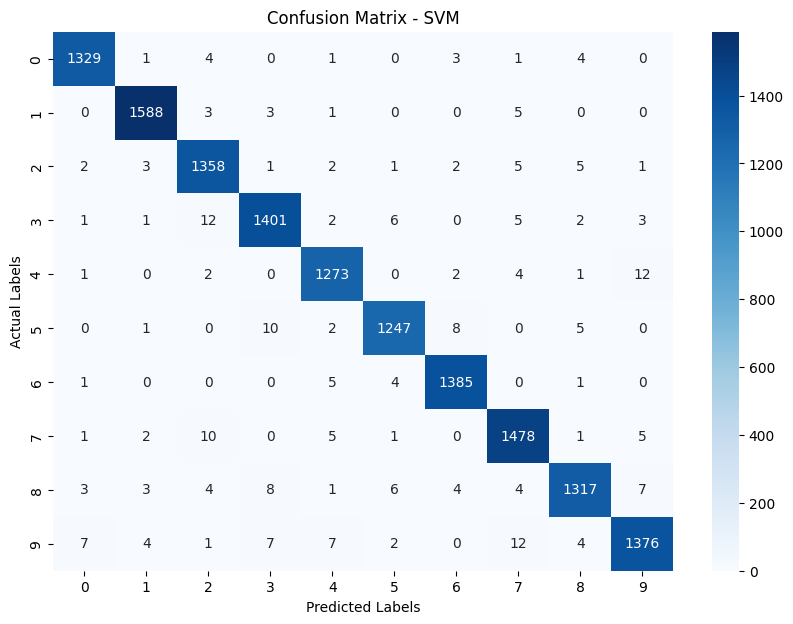

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
# Confusion matrix
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)


# Plot confusion matrix

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Confusion Matrix - SVM")
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.show()

In [ ]:
!pip install matplotlib-venn

In [ ]:
!pip install numpy==1.24.3


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 32.2 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.1.2
    Uninstalling numpy-2.1.2:
      Successfully uninstalled numpy-2.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 1.4.15 requires numpy>=1.24.4, but you have numpy 1.24.3 which is incompatible.
cudf-cu12 24.6.1 requires pandas<2.2.3dev0,>=2.0, but you have pandas 2.2.3 which is incompatible.
gensim 4.3.3 requires scipy<1.14.0,>=1.7.0, but you have scipy 1.14.1 which is incompatible.


# Training Time - SVM

[LibSVM]Iteration 0: Tolerance=0.1, Training time=211.2969617843628 seconds
[LibSVM]Iteration 1: Tolerance=0.01, Training time=210.9193422794342 seconds
[LibSVM]Iteration 2: Tolerance=0.001, Training time=210.3474621772766 seconds
[LibSVM]Iteration 3: Tolerance=0.0001, Training time=209.8470573425293 seconds
[LibSVM]Iteration 4: Tolerance=1e-05, Training time=209.7758083343506 seconds
[LibSVM]Iteration 5: Tolerance=1.0000000000000002e-06, Training time=209.88684797286987 seconds
[LibSVM]Iteration 6: Tolerance=1.0000000000000002e-07, Training time=218.5812726020813 seconds
[LibSVM]Iteration 7: Tolerance=1.0000000000000002e-08, Training time=214.3373703956604 seconds
[LibSVM]Iteration 8: Tolerance=1.0000000000000003e-09, Training time=211.52139592170715 seconds
[LibSVM]Iteration 9: Tolerance=1.0000000000000003e-10, Training time=212.87511253356934 seconds


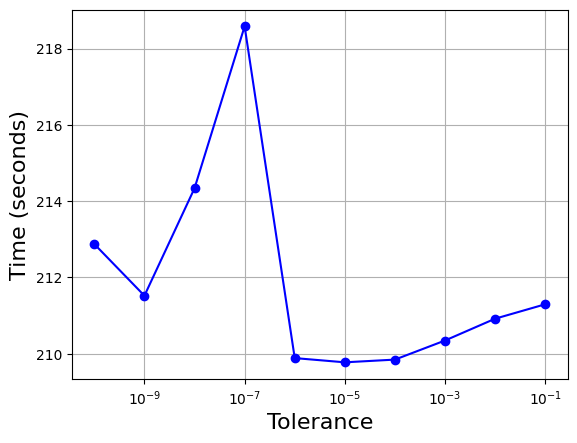

In [ ]:
import time
import pandas as pd
from sklearn.svm import SVC # Import SVC here
import matplotlib.pyplot as plt

tol = 0.1
tols = []
times = []
for i in range(10):
    svm_clf = SVC(kernel="rbf", gamma='scale', C=10, verbose=1)
    t1 = time.time()
    svm_clf.fit(X_train, y_train)
    t2 = time.time()
    times.append(t2-t1)
    tols.append(tol)
    print(f"Iteration {i}: Tolerance={tol}, Training time={t2 - t1} seconds")
    tol /= 10

plt.semilogx(tols, times, "bo-")
plt.xlabel("Tolerance", fontsize=16)
plt.ylabel("Time (seconds)", fontsize=16)
plt.grid(True)
plt.show()

# Training Time- SGD

Iteration 0: Tolerance=0.1, Training time=181.18128752708435 seconds
Iteration 1: Tolerance=0.01, Training time=180.5244584083557 seconds
Iteration 2: Tolerance=0.001, Training time=181.29839205741882 seconds
Iteration 3: Tolerance=0.0001, Training time=179.64388298988342 seconds
Iteration 4: Tolerance=1e-05, Training time=181.10484838485718 seconds
Iteration 5: Tolerance=1.0000000000000002e-06, Training time=179.8807873725891 seconds
Iteration 6: Tolerance=1.0000000000000002e-07, Training time=179.67052793502808 seconds
Iteration 7: Tolerance=1.0000000000000002e-08, Training time=189.9344413280487 seconds
Iteration 8: Tolerance=1.0000000000000003e-09, Training time=210.539874792099 seconds
Iteration 9: Tolerance=1.0000000000000003e-10, Training time=215.22459149360657 seconds


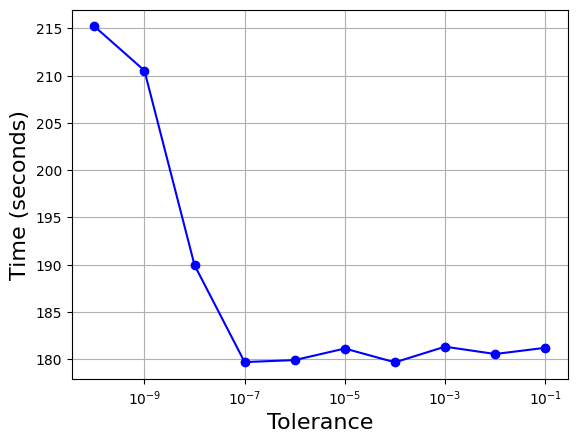

In [5]:
import time
from sklearn.linear_model import SGDClassifier
import matplotlib.pyplot as plt

tol = 0.1
tols = []
times = []
for i in range(10):
    sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
    t1 = time.time()
    sgd_clf.fit(X_train, y_train)
    t2 = time.time()
    times.append(t2-t1)
    tols.append(tol)
    print(f"Iteration {i}: Tolerance={tol}, Training time={t2 - t1} seconds")
    tol /= 10

plt.semilogx(tols, times, "bo-")
plt.xlabel("Tolerance", fontsize=16)
plt.ylabel("Time (seconds)", fontsize=16)
plt.grid(True)
plt.show()

# Training Time - KNN

Iteration 0: Tolerance=0.1, Training time=0.29117417335510254 seconds
Iteration 1: Tolerance=0.01, Training time=0.3163268566131592 seconds
Iteration 2: Tolerance=0.001, Training time=0.31859874725341797 seconds
Iteration 3: Tolerance=0.0001, Training time=0.3198082447052002 seconds
Iteration 4: Tolerance=1e-05, Training time=0.3132188320159912 seconds
Iteration 5: Tolerance=1.0000000000000002e-06, Training time=0.3170590400695801 seconds
Iteration 6: Tolerance=1.0000000000000002e-07, Training time=0.30225706100463867 seconds
Iteration 7: Tolerance=1.0000000000000002e-08, Training time=0.31477832794189453 seconds
Iteration 8: Tolerance=1.0000000000000003e-09, Training time=0.3460266590118408 seconds
Iteration 9: Tolerance=1.0000000000000003e-10, Training time=0.3370935916900635 seconds


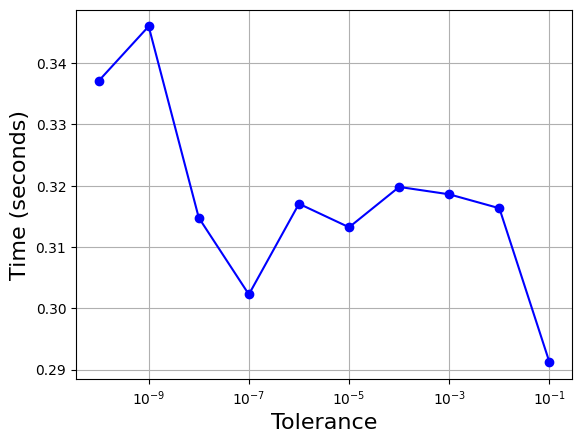

In [6]:
import time
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

tol = 0.1
tols = []
times = []
for i in range(10):
    knn_clf = KNeighborsClassifier(n_neighbors=4, weights='distance')
    t1 = time.time()
    knn_clf.fit(X_train, y_train)
    t2 = time.time()
    times.append(t2-t1)
    tols.append(tol)
    print(f"Iteration {i}: Tolerance={tol}, Training time={t2 - t1} seconds")
    tol /= 10

plt.semilogx(tols, times, "bo-")
plt.xlabel("Tolerance", fontsize=16)
plt.ylabel("Time (seconds)", fontsize=16)
plt.grid(True)
plt.show()

# Training Time - Random Forest

Iteration 0: Tolerance=0.1, Training time=61.59415078163147 seconds
Iteration 1: Tolerance=0.01, Training time=53.09104919433594 seconds
Iteration 2: Tolerance=0.001, Training time=51.29703211784363 seconds
Iteration 3: Tolerance=0.0001, Training time=49.339393615722656 seconds
Iteration 4: Tolerance=1e-05, Training time=50.646541118621826 seconds
Iteration 5: Tolerance=1.0000000000000002e-06, Training time=49.92864990234375 seconds
Iteration 6: Tolerance=1.0000000000000002e-07, Training time=50.95852708816528 seconds
Iteration 7: Tolerance=1.0000000000000002e-08, Training time=49.23547124862671 seconds
Iteration 8: Tolerance=1.0000000000000003e-09, Training time=50.76434922218323 seconds
Iteration 9: Tolerance=1.0000000000000003e-10, Training time=50.195459842681885 seconds


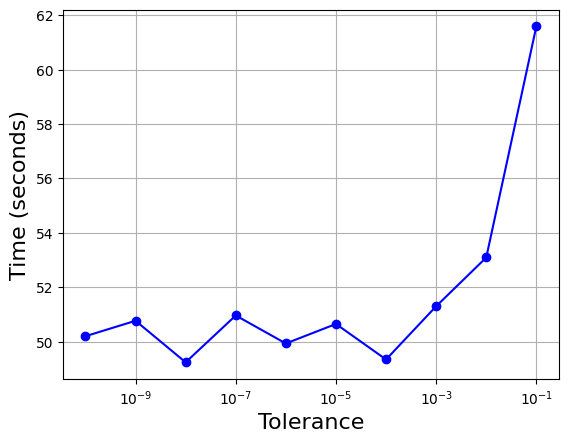

In [7]:
import time
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

tol = 0.1
tols = []
times = []
for i in range(10):
    rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
    t1 = time.time()
    rf_clf.fit(X_train, y_train)
    t2 = time.time()
    times.append(t2-t1)
    tols.append(tol)
    print(f"Iteration {i}: Tolerance={tol}, Training time={t2 - t1} seconds")
    tol /= 10

plt.semilogx(tols, times, "bo-")
plt.xlabel("Tolerance", fontsize=16)
plt.ylabel("Time (seconds)", fontsize=16)
plt.grid(True)
plt.show()

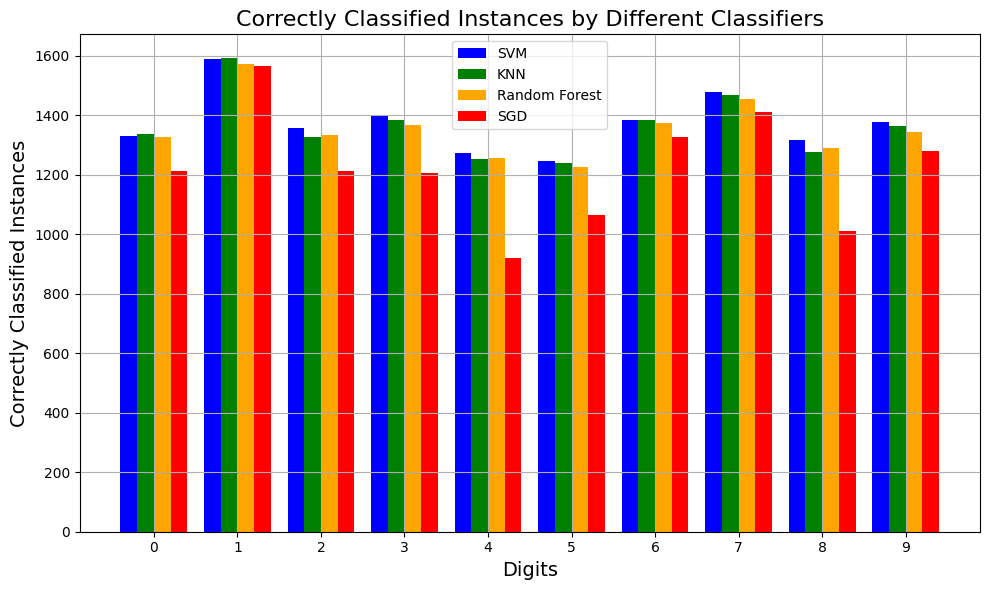

In [4]:
# Creating a bar chart to show the correctly classified instances for each digit using SVM, KNN, Random Forest, and SGD.

import matplotlib.pyplot as plt
import numpy as np

# Data from the table
digits = np.arange(10)
svm = [1329, 1588, 1358, 1401, 1273, 1247, 1385, 1478, 1317, 1376]
knn = [1336, 1592, 1327, 1384, 1254, 1240, 1383, 1467, 1276, 1365]
rf = [1325, 1573, 1334, 1366, 1257, 1226, 1372, 1455, 1290, 1344]
sgd = [1213, 1565, 1212, 1205, 919, 1064, 1327, 1411, 1009, 1279]

# Creating the bar chart
bar_width = 0.2
index = np.arange(len(digits))

plt.figure(figsize=(10, 6))
plt.bar(index, svm, bar_width, label='SVM', color='blue')
plt.bar(index + bar_width, knn, bar_width, label='KNN', color='green')
plt.bar(index + 2 * bar_width, rf, bar_width, label='Random Forest', color='orange')
plt.bar(index + 3 * bar_width, sgd, bar_width, label='SGD', color='red')

# Adding labels and title
plt.xlabel('Digits', fontsize=14)
plt.ylabel('Correctly Classified Instances', fontsize=14)
plt.title('Correctly Classified Instances by Different Classifiers', fontsize=16)
plt.xticks(index + bar_width * 1.5, digits)

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
